In [5]:
import pickle

import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox
import geopandas as gpd

from Illinois_network import *

In [6]:
path = 'data/location'
edges = pd.read_csv(f'{path}/county_edges.csv')

CG = pickle.load(open(f'{path}/IL_graph.dat', 'rb'))
handler = pickle.load(open(f'{path}/graph_handler_counties.dat', 'rb'))
highways = pickle.load(open(f'{path}/osmnx_highways.dat', 'rb'))

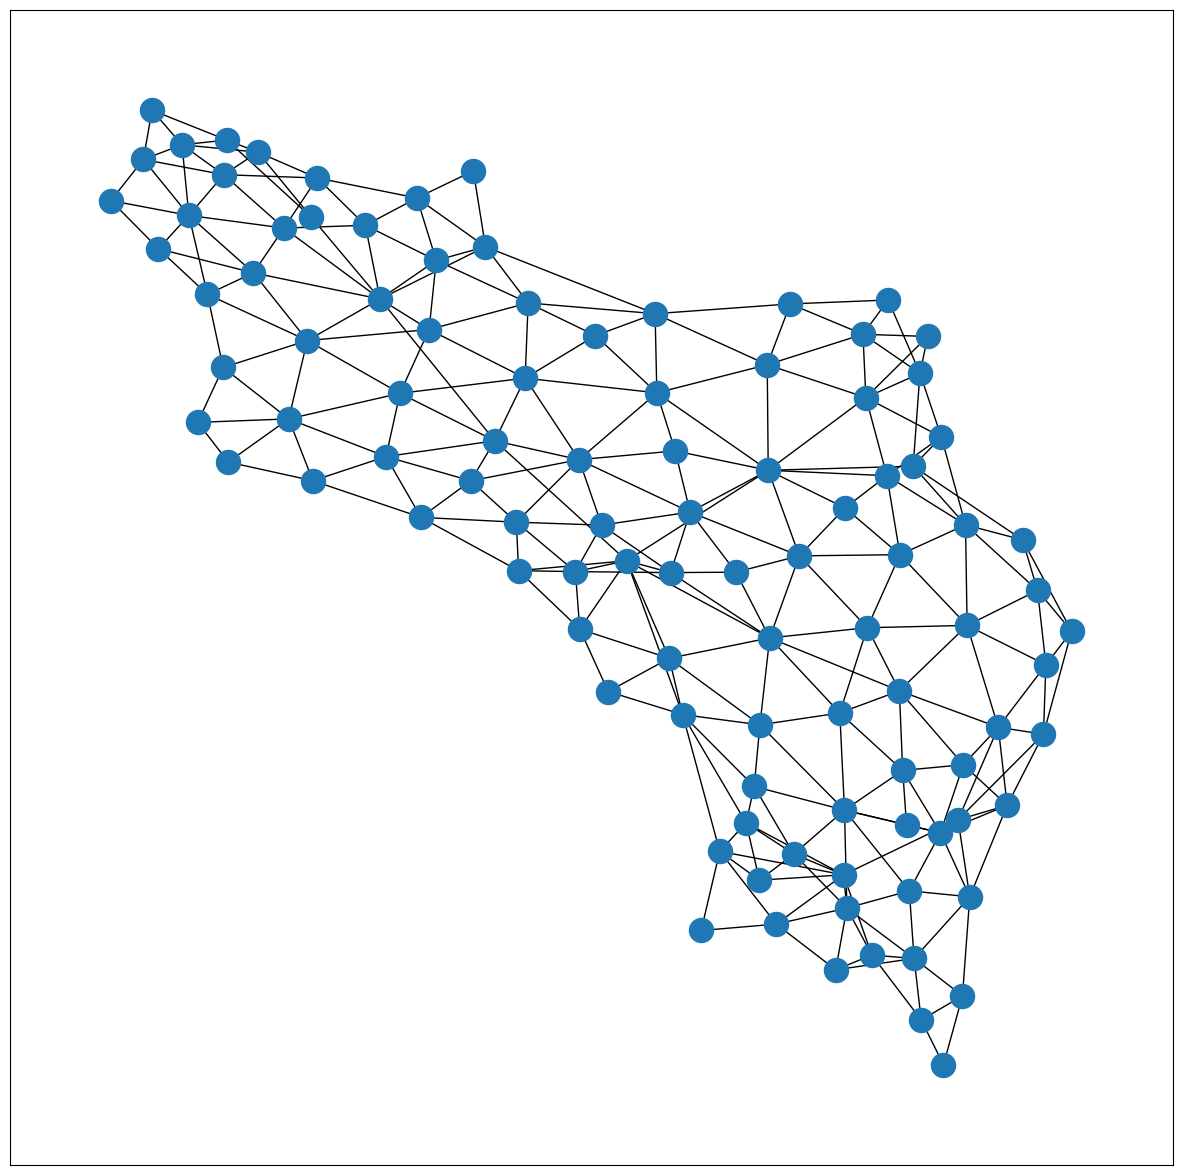

In [7]:
pos = nx.spring_layout(CG)
fig, ax = plt.subplots(figsize=(15, 15))
nx.draw_networkx_nodes(CG, pos, ax=ax)
nx.draw_networkx_edges(CG, pos, ax=ax)
plt.show()

#### That Doesn't look like Illinois!

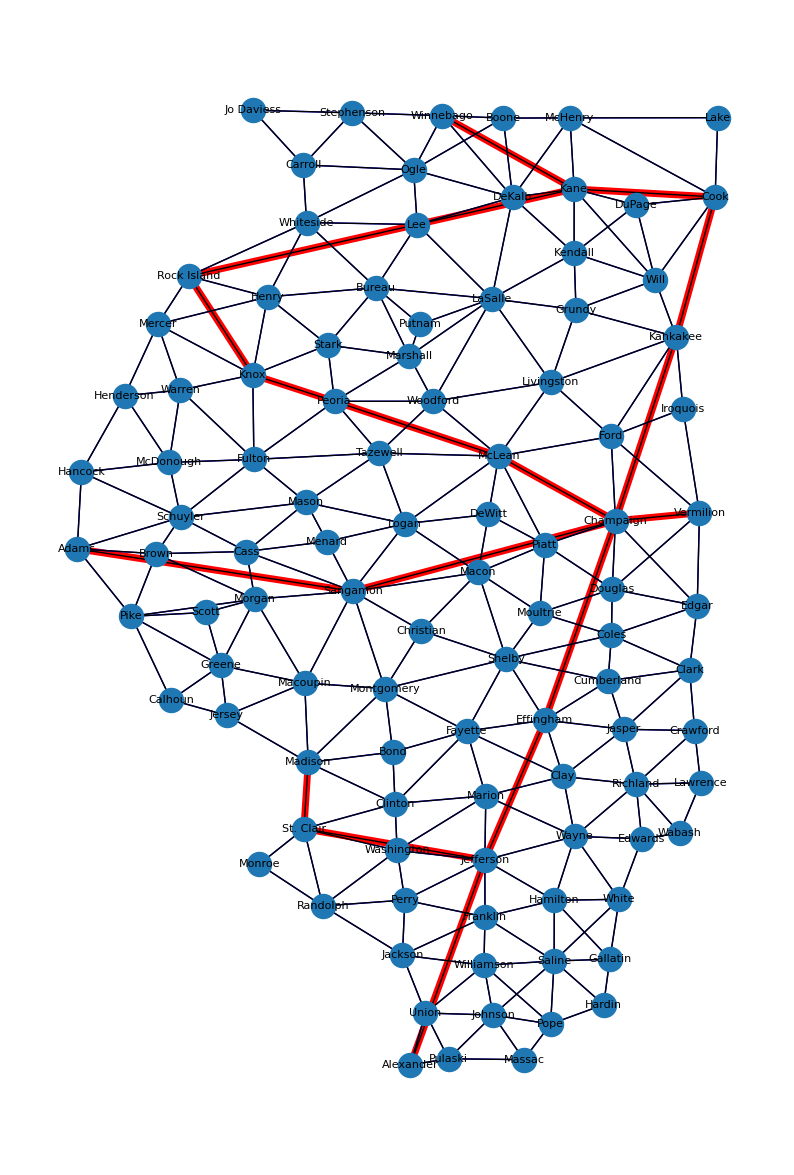

In [8]:
fig, ax = plt.subplots(figsize=(10, 15))

labels = {node: handler[node.name].name for node in CG.nodes()}
node_positions = {node: [node.centroid.x, node.centroid.y] for node in CG.nodes()}


edge_colors = ['red' if CG[src][tgt]['rel'] == 'interstate' else 'blue' for src, tgt in CG.edges()]
edge_widths = [5 if CG[src][tgt]['rel'] == 'interstate' else 1 for src, tgt in CG.edges()]
nx.draw_networkx_edges(CG, pos=node_positions, edge_color=edge_colors, ax=ax, width=edge_widths)

nx.draw(CG, pos=node_positions, ax=ax)
nx.draw_networkx_labels(CG, pos=node_positions, labels=labels, font_size=8, ax=ax)
plt.show()

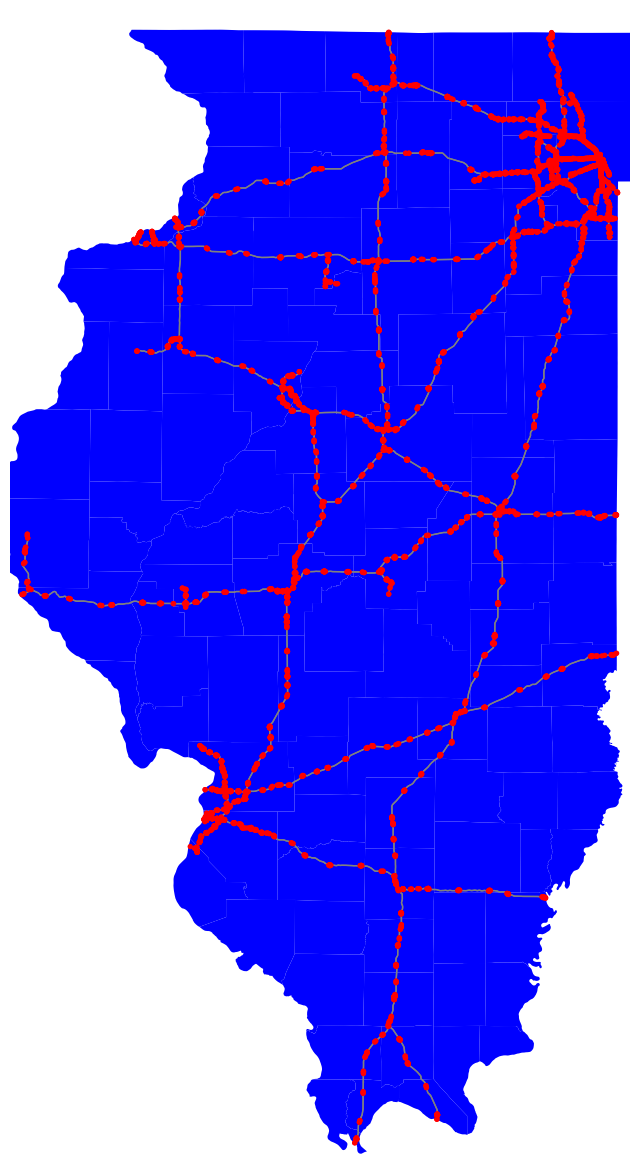

(<Figure size 1500x1500 with 1 Axes>, <Axes: >)

In [9]:
fig, ax = plt.subplots(figsize=(15, 15))
cgdf = gpd.GeoDataFrame({'geometry': [handler[county].geometry for county in handler]})

cgdf.plot(ax=ax, color='blue')

ox.plot_graph(highways, ax=ax, node_color='r', edge_color='gray')

{<my_classes.County at 0x1564a8810>: Text(-87.64586901586009, 41.89561310743707, 'Cook'),
 <my_classes.County at 0x16631d290>: Text(-88.085616963798, 41.85194801392289, 'DuPage'),
 <my_classes.County at 0x16631d390>: Text(-88.42863661892792, 41.93886261834667, 'Kane'),
 <my_classes.County at 0x16631d4d0>: Text(-87.97867967240714, 41.44509773689722, 'Will'),
 <my_classes.County at 0x16631d610>: Text(-89.16070533167691, 42.33635592181084, 'Winnebago'),
 <my_classes.County at 0x16631d7d0>: Text(-87.63137597056462, 42.32535780850523, 'Lake'),
 <my_classes.County at 0x16631d9d0>: Text(-88.45200657445464, 42.32437130588661, 'McHenry'),
 <my_classes.County at 0x16631dad0>: Text(-89.92946232240219, 38.47086425121318, 'St. Clair'),
 <my_classes.County at 0x16631ddd0>: Text(-88.42888400201146, 41.59054429726196, 'Kendall'),
 <my_classes.County at 0x16631dfd0>: Text(-89.90550979335477, 38.83004600326634, 'Madison'),
 <my_classes.County at 0x16631e1d0>: Text(-90.56865610678791, 41.46667462032028, 

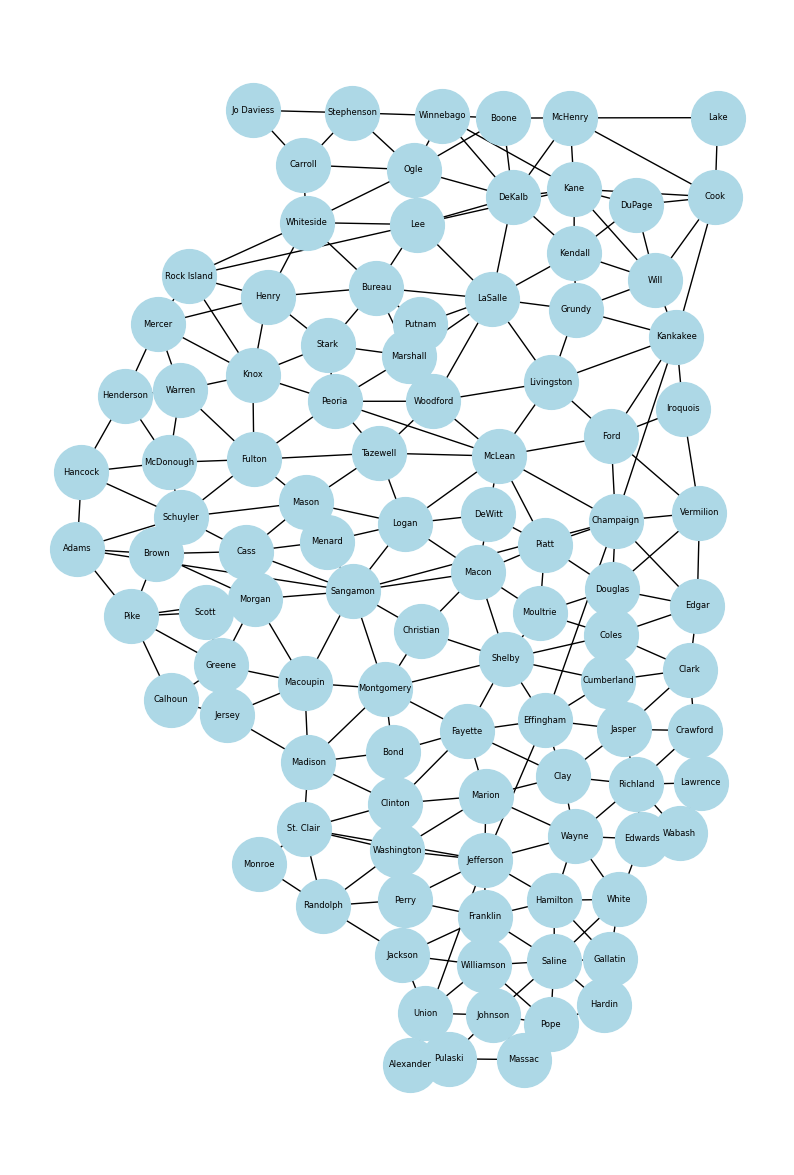

In [10]:
labels = {node: handler[node.name].name for node in CG.nodes()}
fig, ax = plt.subplots(figsize=(10, 15))
node_positions = {node: [node.centroid.x, node.centroid.y] for node in CG.nodes()}
nx.draw(CG, pos=node_positions, ax=ax, node_color='#ADD8E6', node_size=1500, )
nx.draw_networkx_labels(CG, pos=node_positions, labels=labels, font_size=6, ax=ax)

In [11]:
for node in CG.nodes():
    neighbors = [neighbor.name for neighbor in CG.neighbors(node)]
    print(f'Node {node.name} borders: {neighbors}\n')

Node Cook borders: ['McHenry', 'Lake', 'Will', 'DuPage', 'Kane', 'Kankakee']

Node DuPage borders: ['Cook', 'Will', 'Kendall', 'Kane']

Node Kane borders: ['Cook', 'DeKalb', 'DuPage', 'McHenry', 'Will', 'Kendall', 'Winnebago', 'Rock Island']

Node Will borders: ['Cook', 'DuPage', 'Grundy', 'Kane', 'Kankakee', 'Kendall']

Node Winnebago borders: ['Boone', 'DeKalb', 'Ogle', 'Stephenson', 'Kane']

Node Lake borders: ['Cook', 'McHenry']

Node McHenry borders: ['Boone', 'Cook', 'DeKalb', 'Kane', 'Lake']

Node St. Clair borders: ['Clinton', 'Madison', 'Monroe', 'Randolph', 'Washington', 'Jefferson']

Node Kendall borders: ['DeKalb', 'DuPage', 'Grundy', 'Kane', 'Will', 'LaSalle']

Node Madison borders: ['Bond', 'Clinton', 'Jersey', 'Macoupin', 'Montgomery', 'St. Clair']

Node Rock Island borders: ['Henry', 'Mercer', 'Whiteside', 'Kane', 'Knox']

Node Peoria borders: ['Fulton', 'Knox', 'Marshall', 'Stark', 'Woodford', 'Tazewell', 'McLean']

Node Sangamon borders: ['Cass', 'Christian', 'Logan',